In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import cv2

import random
import math
import networkx as nx

import boto3
from PIL import Image

import requests
import json

from tqdm import tqdm
getattr(tqdm, '_instances', {}).clear()  # ⬅ add this line

%matplotlib inline

plt.style.use('dark_background')

pd.set_option('display.max_columns', 50)

In [9]:
import pickle # save images
import time # get time stamp of models trained

import matplotlib.image as mpimg # show images
from io import BytesIO # reading bytes

## Read in final csv

In [3]:
orders_df = pd.read_csv('data/orders_df.csv', index_col=0)

In [4]:
orders_df.head(2)

,file_path,img_name,class_id,txt_labels,order,family,species_group
0,0817/0000139e21dc4d0cbfe14cae3c85c829.jpg,0000139e-21dc-4d0c-bfe1-4cae3c85c829,817,Oak Titmouse,Passeriformes,"Paridae (Tits, Chickadees, and Titmice)","Tits, Chickadees, and Titmice"
1,0817/01a472d8e93047a080aae4f958a2ef47.jpg,01a472d8-e930-47a0-80aa-e4f958a2ef47,817,Oak Titmouse,Passeriformes,"Paridae (Tits, Chickadees, and Titmice)","Tits, Chickadees, and Titmice"


In [23]:
# sns.set()
# sns.palplot(sns.dark_palette("purple"))

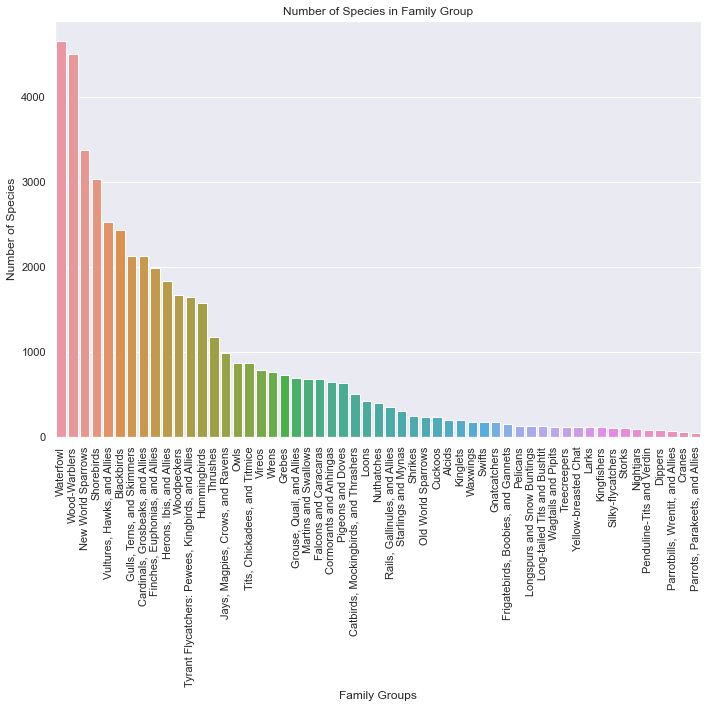

In [14]:
fig, ax = plt.subplots(figsize=(10,10))

ax = sns.countplot(orders_df['species_group'], order=orders_df.groupby('species_group').count()['family'].sort_values(ascending=False).index);
plt.xticks(rotation=90);
ax.set_title('Number of Species in Family Group')
ax.set_xlabel('Family Groups')
ax.set_ylabel('Number of Species')

plt.tight_layout()

In [15]:
final_orders = orders_df[:21129]

In [16]:
len(final_orders)

21129

In [68]:
# final_orders.to_csv('data/final_orders.csv')

In [71]:
what = pd.read_csv('data/final_orders.csv', index_col=0)

In [73]:
what.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21129 entries, 0 to 21128
Data columns (total 7 columns):
file_path        21129 non-null object
img_name         21129 non-null object
class_id         21129 non-null int64
txt_labels       21129 non-null object
order            21129 non-null object
family           21129 non-null object
species_group    21129 non-null object
dtypes: int64(1), object(6)
memory usage: 1.3+ MB


In [10]:
np.unique(final_orders['species_group'])

array(['Alcids', 'Blackbirds', 'Cardinals, Grosbeaks, and Allies',
       'Catbirds, Mockingbirds, and Thrashers', 'Cormorants and Anhingas',
       'Cuckoos', 'Falcons and Caracaras',
       'Finches, Euphonias, and Allies', 'Grebes',
       'Grouse, Quail, and Allies', 'Gulls, Terns, and Skimmers',
       'Herons, Ibis, and Allies', 'Hummingbirds',
       'Jays, Magpies, Crows, and Ravens', 'Kingfishers', 'Kinglets',
       'Longspurs and Snow Buntings', 'Loons', 'Martins and Swallows',
       'New World Sparrows', 'Nuthatches', 'Owls', 'Pelicans',
       'Penduline-Tits and Verdin', 'Pigeons and Doves', 'Shorebirds',
       'Shrikes', 'Starlings and Mynas', 'Swifts', 'Thrushes',
       'Tits, Chickadees, and Titmice',
       'Tyrant Flycatchers: Pewees, Kingbirds, and Allies', 'Vireos',
       'Vultures, Hawks, and Allies', 'Wagtails and Pipits', 'Waterfowl',
       'Wood-Warblers', 'Woodpeckers', 'Wrens'], dtype=object)

In [166]:
np.unique(final_orders['family'])

array(['Accipitridae (Hawks, Eagles, and Kites)',
       'Alcedinidae (Kingfishers)', 'Alcidae (Auks, Murres, and Puffins)',
       'Anatidae (Ducks, Geese, and Waterfowl)', 'Anhingidae (Anhingas)',
       'Apodidae (Swifts)', 'Ardeidae (Herons, Egrets, and Bitterns)',
       'Calcariidae (Longspurs and Snow Buntings)',
       'Cardinalidae (Cardinals and Allies)',
       'Cathartidae (New World Vultures)',
       'Charadriidae (Plovers and Lapwings)',
       'Columbidae (Pigeons and Doves)',
       'Corvidae (Crows, Jays, and Magpies)', 'Cuculidae (Cuckoos)',
       'Falconidae (Falcons and Caracaras)',
       'Fringillidae (Finches, Euphonias, and Allies)',
       'Gaviidae (Loons)', 'Haematopodidae (Oystercatchers)',
       'Hirundinidae (Swallows)', 'Icteridae (Troupials and Allies)',
       'Laniidae (Shrikes)', 'Laridae (Gulls, Terns, and Skimmers)',
       'Mimidae (Mockingbirds and Thrashers)',
       'Motacillidae (Wagtails and Pipits)',
       'Odontophoridae (New World Quail

In [17]:
group_sort = final_orders.groupby('species_group').count()['family'].sort_values(ascending=False)

In [18]:
group_sort.index.values

array(['Waterfowl', 'Wood-Warblers', 'Blackbirds', 'New World Sparrows',
       'Cardinals, Grosbeaks, and Allies', 'Shorebirds',
       'Vultures, Hawks, and Allies', 'Finches, Euphonias, and Allies',
       'Gulls, Terns, and Skimmers', 'Hummingbirds',
       'Tyrant Flycatchers: Pewees, Kingbirds, and Allies',
       'Herons, Ibis, and Allies', 'Thrushes', 'Owls',
       'Grouse, Quail, and Allies', 'Cormorants and Anhingas',
       'Falcons and Caracaras', 'Vireos', 'Starlings and Mynas',
       'Tits, Chickadees, and Titmice',
       'Jays, Magpies, Crows, and Ravens', 'Martins and Swallows',
       'Woodpeckers', 'Wrens', 'Grebes', 'Cuckoos',
       'Catbirds, Mockingbirds, and Thrashers', 'Alcids',
       'Pigeons and Doves', 'Longspurs and Snow Buntings', 'Kinglets',
       'Shrikes', 'Wagtails and Pipits', 'Loons', 'Kingfishers',
       'Penduline-Tits and Verdin', 'Nuthatches', 'Pelicans', 'Swifts'],
      dtype=object)

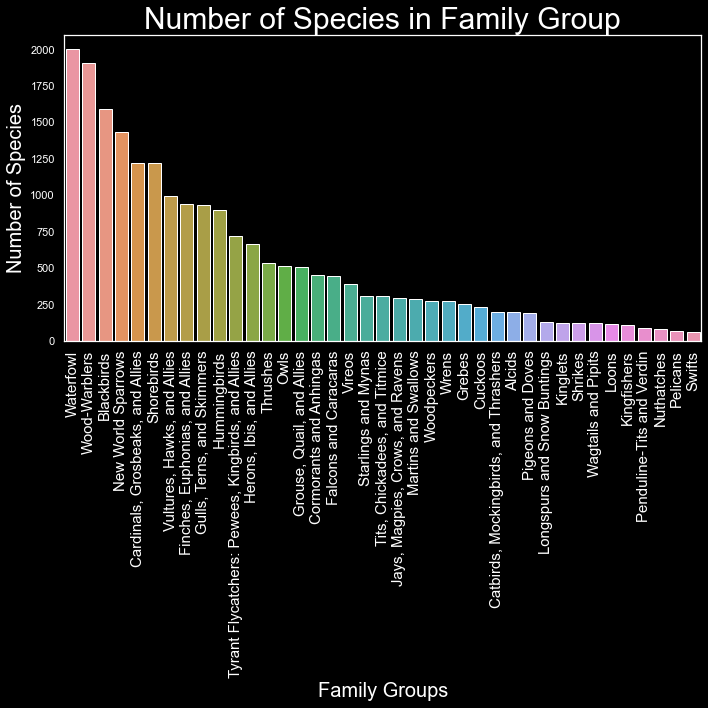

In [108]:
fig, ax = plt.subplots(figsize=(10,10))

ax = sns.countplot(final_orders['species_group'], order=group_sort.index);
plt.xticks(rotation=90, fontsize=15);
ax.set_title('Number of Species in Family Group', fontsize=30)
ax.set_xlabel('Family Groups', fontsize=20)
ax.set_ylabel('Number of Species', fontsize=20)
ax.grid(False)

plt.tight_layout()

plt.savefig('graphs/num_fam_group.png')

In [20]:
group_top5 = final_orders.groupby('species_group').count()['family'].sort_values(ascending=False)[:5]

In [21]:
group_top5

species_group
Waterfowl                           1999
Wood-Warblers                       1902
Blackbirds                          1587
New World Sparrows                  1428
Cardinals, Grosbeaks, and Allies    1219
Name: family, dtype: int64

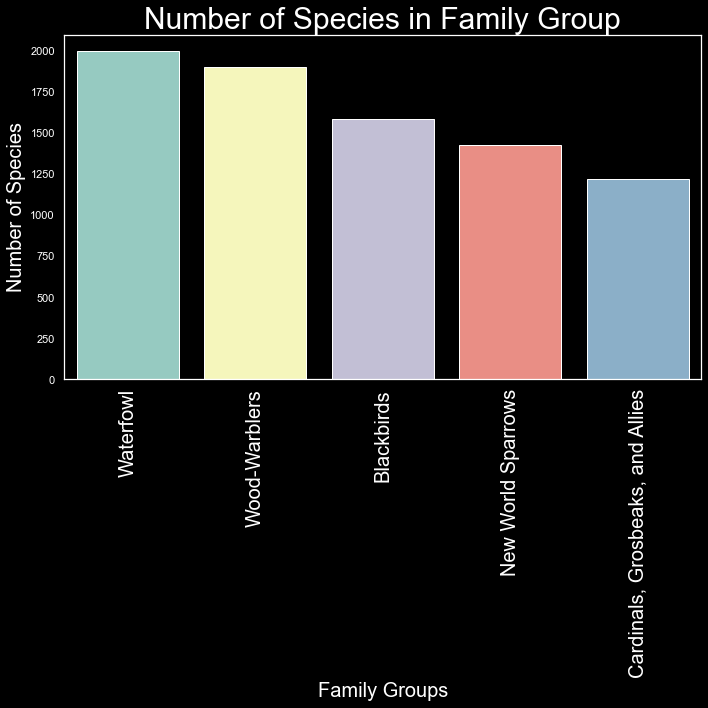

In [110]:
fig, ax = plt.subplots(figsize=(10,10))

ax = sns.barplot(x=group_top5.index.values, y=group_top5.values);
plt.xticks(rotation=90, fontsize=20);
ax.set_title('Number of Species in Family Group', fontsize=30)
ax.set_xlabel('Family Groups', fontsize=20)
ax.set_ylabel('Number of Species', fontsize=20)
ax.grid(False)
plt.tight_layout()

plt.savefig('graphs/top5_fam_group.png')

In [99]:
order_sort = final_orders.groupby('order').count()['species_group'].sort_values(ascending=False)

In [100]:
len(order_sort.index.values)

17

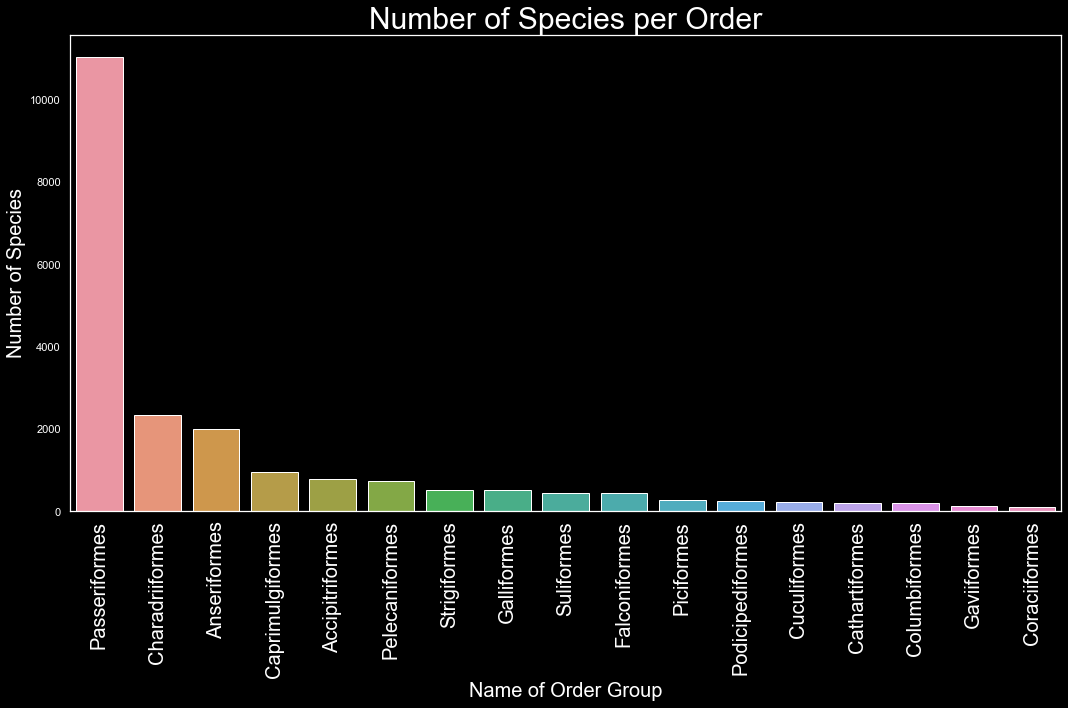

In [104]:
fig, ax = plt.subplots(figsize=(15,10))

ax = sns.countplot(final_orders['order'], order=order_sort.index);
plt.xticks(rotation=90, fontsize=20);
ax.set_title('Number of Species per Order', fontsize=30)
ax.set_xlabel('Name of Order Group', fontsize=20)
ax.set_ylabel('Number of Species', fontsize=20)
ax.grid(False)
plt.tight_layout()

plt.savefig('graphs/num_species_order.png')

## Plot Num Species in Orders

In [111]:
final_orders[final_orders['species_group']=='Cardinals, Grosbeaks, and Allies']['file_path'][1055:1057]

18483    0771/feffb4db5f704fc1a5a784a3dc56a877.jpg
19781    0770/01022e9f70694b6a80ef5d166e6025dc.jpg
Name: file_path, dtype: object

In [26]:
bucket = 'cwbirdsimages'
img_dir = 'images'

In [69]:
s3 = boto3.client('s3')

# grab duck image
obj = s3.get_object(Bucket=bucket, Key=f'images/0337/47b4bab08e524f0f9dff439c5386b70b.jpg')
img_bytes = BytesIO(obj['Body'].read())
waterfowl1 = Image.open(img_bytes)

# grab hawk image
obj = s3.get_object(Bucket=bucket, Key=f'images/0860/9593362c9fe54d1297356000a11f6aa5.jpg')
img_bytes = BytesIO(obj['Body'].read())
woodwarbler1 = Image.open(img_bytes)

# grab finch image
obj = s3.get_object(Bucket=bucket, Key=f'images/0988/914616d508cc46dd8b155c997c41b37f.jpg')
img_bytes = BytesIO(obj['Body'].read())
blackbird1 = Image.open(img_bytes)

# grab finch image
obj = s3.get_object(Bucket=bucket, Key=f'images/0899/77cf5ac8c6b243509384657586229871.jpg')
img_bytes = BytesIO(obj['Body'].read())
newworldsparrow1 = Image.open(img_bytes)

# grab finch image
obj = s3.get_object(Bucket=bucket, Key=f'images/0771/ed7362f8ad1a4939a2c89bc7ed81a283.jpg')
img_bytes = BytesIO(obj['Body'].read())
cardinals1 = Image.open(img_bytes)

In [28]:
# fig, axes = plt.subplots(3, 4, figsize=(20,10));

# fig.suptitle('RGB Channels of Images', y=1.1, fontsize=20)

# axes[0][0].imshow(waterfowl1);
# axes[0][0].set_title('original')
# for ax, channel, name in zip(axes[0][1:], waterfowl1.split(), ['red channel', 'green channel', 'blue channel']):
#     ax.imshow(channel, cmap=f'{name.split()[0].capitalize()}s_r');
#     ax.set_title(name)
    
# axes[1][0].imshow(woodwarbler1);
# axes[1][0].set_title('original')
# for ax, channel, name in zip(axes[1][1:], woodwarbler1.split(), ['red channel', 'green channel', 'blue channel']):
#     ax.imshow(channel, cmap=f'{name.split()[0].capitalize()}s_r');
#     ax.set_title(name)
    
# axes[2][0].imshow(blackbird1);
# axes[2][0].set_title('original')
# for ax, channel, name in zip(axes[2][1:], blackbird1.split(), ['red channel', 'green channel', 'blue channel']):
#     ax.imshow(channel, cmap=f'{name.split()[0].capitalize()}s_r');
#     ax.set_title(name)

# plt.tight_layout()

In [30]:
plt.style.use('dark_background')

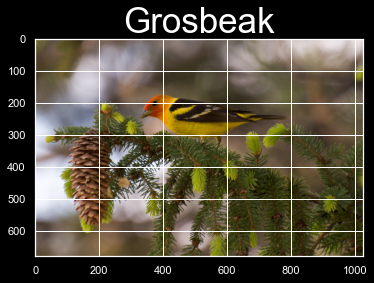

In [71]:
plt.title('Grosbeak',fontsize=35)
plt.imshow(cardinals1);
plt.savefig('graphs/grosbeaks.png')

In [118]:
final_orders[final_orders['species_group']=='Waterfowl']['order']

1267     Anseriformes
1268     Anseriformes
1269     Anseriformes
1270     Anseriformes
1271     Anseriformes
             ...     
20501    Anseriformes
20502    Anseriformes
20503    Anseriformes
20504    Anseriformes
20505    Anseriformes
Name: order, Length: 1999, dtype: object

In [81]:
order_fam = final_orders[final_orders['order']=='Passeriformes'].groupby('species_group').count()['order'].sort_values(ascending=False)

In [84]:
order_fam.index.values

array(['Wood-Warblers', 'Blackbirds', 'New World Sparrows',
       'Cardinals, Grosbeaks, and Allies',
       'Finches, Euphonias, and Allies',
       'Tyrant Flycatchers: Pewees, Kingbirds, and Allies', 'Thrushes',
       'Vireos', 'Starlings and Mynas', 'Tits, Chickadees, and Titmice',
       'Jays, Magpies, Crows, and Ravens', 'Martins and Swallows',
       'Wrens', 'Catbirds, Mockingbirds, and Thrashers',
       'Longspurs and Snow Buntings', 'Kinglets', 'Shrikes',
       'Wagtails and Pipits', 'Penduline-Tits and Verdin', 'Nuthatches'],
      dtype=object)

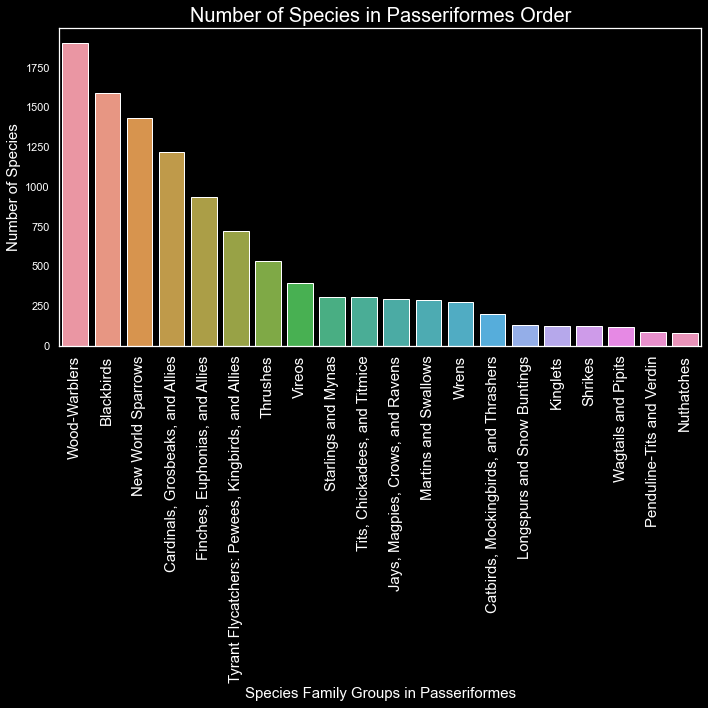

In [97]:
plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(10,10))

ax = sns.barplot(x=order_fam.index.values, y=order_fam.values);
plt.xticks(rotation=90, fontsize=15);
ax.set_title('Number of Species in Passeriformes Order', fontsize=20)
ax.set_xlabel('Species Family Groups in Passeriformes', fontsize=15)
ax.set_ylabel('Number of Species', fontsize=15)
ax.grid(False)
plt.tight_layout()

plt.savefig('graphs/num_passer_order.png')

In [25]:
img_dir = 'images' # folder containing all other folders of images
paths = orders_df['file_path']
bucket = 'cwbirdsimages'

def resize_images_array(img_dir, file_paths):
    # arrays of image pixels
    img_arrays = []
    
    paths = []
    
    # loop through the dataframe that is linked to its label so that all images are in the same order
    for path in tqdm(file_paths):
        s3 = boto3.client('s3')
        try:
            obj = s3.get_object(Bucket=bucket, Key=f'{img_dir}/{path}')
            img_bytes = BytesIO(obj['Body'].read())
            open_img = Image.open(img_bytes)
            arr = np.array(open_img.resize((299,299))) # resize to 200,200. possible to play around with better or worse resolution
            img_arrays.append(arr)
            paths.append(path)
        except:
#             print(path) # get file_path of ones that fail to load
            continue
    return np.array(img_arrays)

In [26]:
# X = resize_images_array(img_dir, orders_df['file_path'][:21129])

In [ ]:
print('length of sample: ', len(X))
X.shape

In [ ]:
# normalize the RBG values
X = X/255.0

In [ ]:
# grab numeric label
# VALUES MUST BE NP.ARRAYS

label = np.array(orders_df['order'][:21129].values)

In [ ]:
label

In [ ]:
# labels are alphabetical
y = (label.reshape(-1,1) == np.unique(orders_df['order'][:21129])).astype(float)

In [ ]:
y[0]

In [ ]:
print('label shape: ', y.shape)
print('features shape: ', X.shape)

In [ ]:
n_categories = y.shape[1]

In [ ]:
n_categories

## Transfer Learning

In [83]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization # CNN
from tensorflow.keras.models import Model

from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications import Xception
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, RMSprop

from tensorflow.keras.callbacks import TensorBoard # graphical visual of loss and accuracy over the epochs of train and test set
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import datetime

tf.__version__

'2.2.0'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

In [ ]:
log_xcept = os.path.join("logs/orders_xception", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = TensorBoard(log_dir=log_xcept, histogram_freq=1)

In [ ]:
input_size = (299,299,3)

In [ ]:
def create_transfer_model(input_size, n_categories, weights = 'imagenet'):
        # note that the "top" is not included in the weights below
        base_model = Xception(weights=weights,
                          include_top=False,
                          input_shape=input_size)
        
        model = base_model.output
        model = GlobalAveragePooling2D()(model)
        predictions = Dense(n_categories, activation='softmax')(model)
        model = Model(inputs=base_model.input, outputs=predictions)
        
        return model

In [ ]:
transfer_model = create_transfer_model((299,299,3),n_categories)

In [ ]:
def change_trainable_layers(model, trainable_index):
    for layer in model.layers[:trainable_index]:
        layer.trainable = False
    for layer in model.layers[trainable_index:]:
        layer.trainable = True

In [ ]:
_ = change_trainable_layers(transfer_model, 132)

In [ ]:
# print_model_properties(transfer_model, 130)

In [ ]:
transfer_model.compile(optimizer=RMSprop(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
xception_final = transfer_model.fit(X, y, batch_size=1000, epochs=5, validation_split=0.1, callbacks=[tensorboard_callback])

In [84]:
# transfer_model.save('saved_models/orders_xception.h5')
species_xception = tf.keras.models.load_model('saved_models/species_xception.h5')

In [85]:
pickle.dump(species_xception, open('saved_models/species_xception.p', 'wb'))

TypeError: can't pickle _thread.RLock objects

In [40]:
species_xception.

TypeError: 'list' object is not callable

In [ ]:
file = 'static/images/meet_duck.png'
a = Image.open(file)
c = np.array(a.resize((299,299)))

In [ ]:
ans = orders_xception.predict(c.reshape(1,299,299,3))

In [ ]:
ans

In [ ]:
np.round(ans * 100, 1)[0].argsort()[-1:-4:-1]

In [ ]:
np.unique(label)

In [28]:
# %reload_ext tensorboard

# %tensorboard --logdir='logs/orders_xception/'

In [ ]:
epoch_range = range(1, 11)

try:
    fig, axes = plt.subplots(1,2,figsize=(12,6))
    axes[0].plot(epoch_range, acc, label='Training Accuracy')
    axes[0].plot(epoch_range, val_acc, label='Validation Accuracy')
    axes[0].set_ylabel('Accuracy')
    axes[0].set_xlabel('Number of Epochs')
    axes[0].legend(loc='upper left')
    axes[0].set_title('Training and Validation Accuracy')
    
    axes[1].plot(epoch_range, loss, label='Training Loss')
    axes[1].plot(epoch_range, val_loss, label='Validation Loss')
    axes[1].set_ylabel('Cross Entropy')
    axes[1].set_xlabel('Number of Epochs')
    axes[1].legend(loc='upper left')
    axes[1].set_title('Training and Validation Loss')
    plt.savefig('graphs/xception_acc_loss.png')
    print('Accuracy and Loss graph saved')
except:
    print('acc and loss graph failed')
    pass